In [20]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import ttest_ind

#Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Create a file path
filepath = "mxmh_survey_results.csv"

# Read in the data.
survey_results = pd.read_csv(filepath)
survey_results.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [22]:
survey_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [23]:
# Replace all column names
survey_results = survey_results.rename(columns={
    'Timestamp': 'timestamp',
    'Age': 'age',
    'Primary streaming service': 'streaming_service',
    'Hours per day': 'hours_per_day',
    'While working': 'while_working',
    'Instrumentalist': 'instrumentalist',
    'Composer': 'composer',
    'Fav genre': 'fav_genre',
    'Exploratory': 'exploratory',
    'Foreign languages': 'foreign_language',
    'BPM': 'bpm',
    'Frequency [Classical]': 'freq_classical',
    'Frequency [Country]': 'freq_country',
    'Frequency [EDM]': 'freq_edm',
    'Frequency [Folk]': 'freq_folk',
    'Frequency [Gospel]': 'freq_gospel',
    'Frequency [Hip hop]': 'freq_hiphop',
    'Frequency [Jazz]': 'freq_jazz',
    'Frequency [K pop]': 'freq_kpop',
    'Frequency [Latin]': 'freq_latin',
    'Frequency [Lofi]': 'freq_lofi',
    'Frequency [Metal]': 'freq_metal',
    'Frequency [Pop]': 'freq_pop',
    'Frequency [R&B]': 'freq_rnb',
    'Frequency [Rap]': 'freq_rap',
    'Frequency [Rock]': 'freq_rock',
    'Frequency [Video game music]': 'freq_video_game',
    'Anxiety': 'anxiety',
    'Depression': 'depression',
    'Insomnia': 'insomnia',
    'OCD': 'ocd',
    'Music effects': 'music_effects',
    'Permissions': 'permissions'
})
survey_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          736 non-null    object 
 1   age                735 non-null    float64
 2   streaming_service  735 non-null    object 
 3   hours_per_day      736 non-null    float64
 4   while_working      733 non-null    object 
 5   instrumentalist    732 non-null    object 
 6   composer           735 non-null    object 
 7   fav_genre          736 non-null    object 
 8   exploratory        736 non-null    object 
 9   foreign_language   732 non-null    object 
 10  bpm                629 non-null    float64
 11  freq_classical     736 non-null    object 
 12  freq_country       736 non-null    object 
 13  freq_edm           736 non-null    object 
 14  freq_folk          736 non-null    object 
 15  freq_gospel        736 non-null    object 
 16  freq_hiphop        736 non

In [24]:
survey_clean = survey_results.dropna()
survey_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 2 to 735
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          616 non-null    object 
 1   age                616 non-null    float64
 2   streaming_service  616 non-null    object 
 3   hours_per_day      616 non-null    float64
 4   while_working      616 non-null    object 
 5   instrumentalist    616 non-null    object 
 6   composer           616 non-null    object 
 7   fav_genre          616 non-null    object 
 8   exploratory        616 non-null    object 
 9   foreign_language   616 non-null    object 
 10  bpm                616 non-null    float64
 11  freq_classical     616 non-null    object 
 12  freq_country       616 non-null    object 
 13  freq_edm           616 non-null    object 
 14  freq_folk          616 non-null    object 
 15  freq_gospel        616 non-null    object 
 16  freq_hiphop        616 non-null

In [25]:
122/738

0.16531165311653118

In [26]:
survey_clean.composer.value_counts()

composer
No     508
Yes    108
Name: count, dtype: int64

In [27]:
survey_clean["composer"] = survey_clean.composer.apply(lambda x: True if x == "Yes" else False)
survey_clean["while_working"] = survey_clean.while_working.apply(lambda x: True if x == "Yes" else False)
survey_clean["instrumentalist"] = survey_clean.instrumentalist.apply(lambda x: True if x == "Yes" else False)
survey_clean["exploratory"] = survey_clean.exploratory.apply(lambda x: True if x == "Yes" else False)
survey_clean["foreign_language"] = survey_clean.foreign_language.apply(lambda x: True if x == "Yes" else False)
survey_clean.head()


C:\Users\gmyou\AppData\Local\Temp\ipykernel_37160\1473642194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean["composer"] = survey_clean.composer.apply(lambda x: True if x == "Yes" else False)
C:\Users\gmyou\AppData\Local\Temp\ipykernel_37160\1473642194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean["while_working"] = survey_clean.while_working.apply(lambda x: True if x == "Yes" else False)
C:\Users\gmyou\AppData\Local\Temp\ipykernel_37160\1473642194.py:3: SettingWithCopyWa

,timestamp,age,streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_language,...,freq_rnb,freq_rap,freq_rock,freq_video_game,anxiety,depression,insomnia,ocd,music_effects,permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,False,False,False,Video game music,False,True,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,True,False,True,Jazz,True,True,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,True,False,False,R&B,True,False,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,True,True,True,Jazz,True,True,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,True,True,False,Video game music,True,True,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [28]:
survey_clean['timestamp'] = pd.to_datetime(survey_clean['timestamp'])
survey_clean.head()

C:\Users\gmyou\AppData\Local\Temp\ipykernel_37160\2218098501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean['timestamp'] = pd.to_datetime(survey_clean['timestamp'])


,timestamp,age,streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_language,...,freq_rnb,freq_rap,freq_rock,freq_video_game,anxiety,depression,insomnia,ocd,music_effects,permissions
2,2022-08-27 21:28:18,18.0,Spotify,4.0,False,False,False,Video game music,False,True,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,True,False,True,Jazz,True,True,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,True,False,False,R&B,True,False,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,2022-08-27 21:56:50,18.0,Spotify,5.0,True,True,True,Jazz,True,True,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,2022-08-27 22:00:29,18.0,YouTube Music,3.0,True,True,False,Video game music,True,True,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [29]:
# The maximum x value for our chart will be 100
#x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
#x_axis = np.arange(0, x_limit, 1)

In [30]:
#Average Age
mean_age = survey_clean["age"].mean()
mean_age

24.792207792207794

In [31]:
#Average Age per Condition
mean_age_anxiety = survey_clean.groupby("anxiety").age.mean()
mean_age_depression = survey_clean.groupby("depression").age.mean()
mean_age_insomnia = survey_clean.groupby("insomnia").age.mean()
mean_age_ocd = survey_clean.groupby("ocd").age.mean()

#Combine each average age into a single dataframe
avg_age_per_condition = pd.DataFrame({"anxiety" : mean_age_anxiety,
                                    "depression" : mean_age_depression,
                                    "insomnia" : mean_age_insomnia,
                                    "ocd" : mean_age_ocd
})
# Display DF
avg_age_per_condition


,anxiety,depression,insomnia,ocd
0.0,33.148148,27.075758,24.007812,25.699029
1.0,32.952381,28.500000,25.281250,28.802469
2.0,27.000000,24.575342,28.590909,25.620253
3.0,25.830508,23.409091,24.114754,22.909091
3.5,NaN,16.000000,16.000000,NaN
4.0,26.187500,27.446429,22.717391,23.057143
5.0,24.375000,24.687500,23.285714,21.750000
5.5,NaN,NaN,NaN,16.000000
6.0,23.608108,23.512821,24.039216,21.896552
7.0,22.600000,23.300000,24.981481,22.592593


   Score Mental Health Condition  Average Age
0    0.0                 anxiety    33.148148
1    1.0                 anxiety    32.952381
2    2.0                 anxiety    27.000000
3    3.0                 anxiety    25.830508
4    3.5                 anxiety          NaN


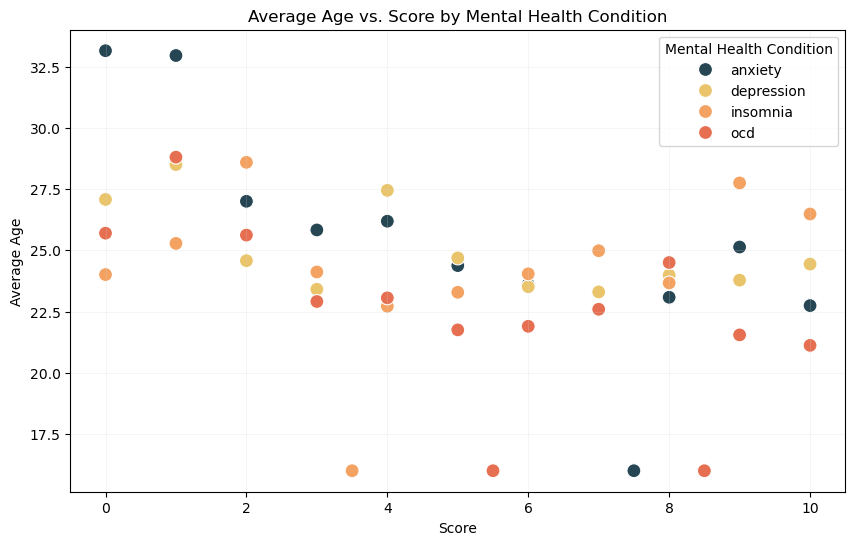

In [32]:
# Mental Health List Filtered
age_column = "age"
mental_health_conditions = ["anxiety", "depression", "insomnia", "ocd"]

# Define custom colors for each mental health condition
custom_colors = {
    "anxiety": "#264653",
    "depression": "#E9C46A",
    "insomnia": "#F4A261",
    "ocd": "#E76F51"
}

# Reset the index and rename it to "Score"
avg_age_per_condition_reset = avg_age_per_condition.reset_index().rename(columns={"index": "Score"})

# Melt the DataFrame with "Score" as an id_vars
avg_age_per_condition_melted = avg_age_per_condition_reset.melt(
    id_vars=["Score"],  # Use "Score" as identifier
    var_name="Mental Health Condition",  # Column name for melted conditions
    value_name="Average Age"  # Column name for melted values
)

# Inspect the melted DataFrame
print(avg_age_per_condition_melted.head())

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=avg_age_per_condition_melted,
    x="Score",  # Score on the x-axis
    y="Average Age",  # Age on the y-axis
    hue="Mental Health Condition",  # Color by Mental Health Condition
    palette=custom_colors,  # Custom colors
    s=100  # Marker size
)

# Add grid lines
plt.grid(True, alpha=0.3, color='lightgray', linestyle='-', linewidth=0.5)

# Add a title and labels
plt.title("Average Age vs. Score by Mental Health Condition")
plt.xlabel("Score")
plt.ylabel("Average Age")

# Show the plot
plt.show()

In [33]:
# Group by Mental Health Condition and count the number of records
condition_counts = survey_clean[mental_health_conditions].melt().groupby("variable").size()



In [34]:
# Group the data by mental health condition and calculate group counts
condition_counts = (
    survey_clean[mental_health_conditions]  # Subset the conditions
    .melt(var_name="Mental Health Condition")  # Melt the data for consistent structure
    .groupby("Mental Health Condition")  # Group by condition
    .size()  # Count group sizes
    .reset_index(name="Count")  # Convert Series to DataFrame and rename column
)

# Inspect the counts
print(condition_counts)

  Mental Health Condition  Count
0                 anxiety    616
1              depression    616
2                insomnia    616
3                     ocd    616


C:\Users\gmyou\AppData\Local\Temp\ipykernel_37160\2982451494.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=long_df, x='Genre', y='Frequency', palette= colors_list)
C:\Users\gmyou\AppData\Local\Temp\ipykernel_37160\2982451494.py:35: UserWarning: 
The palette list has fewer values (4) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=long_df, x='Genre', y='Frequency', palette= colors_list)


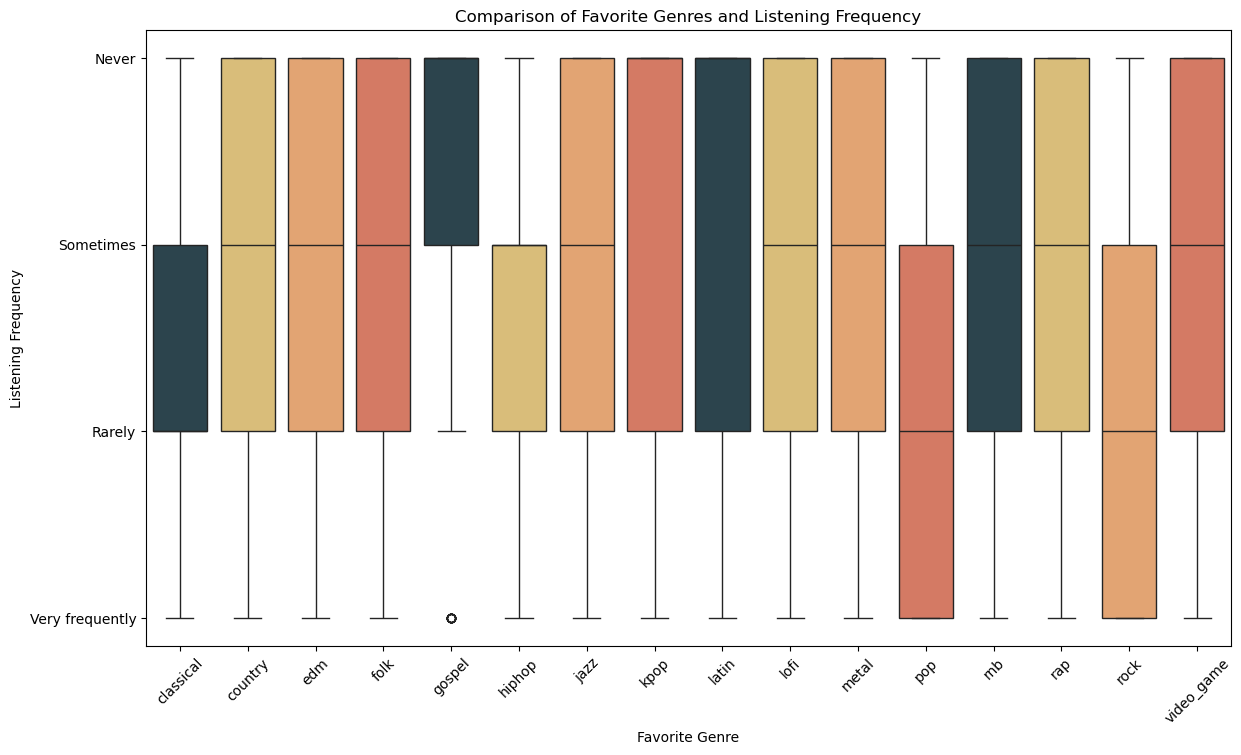

In [35]:
#boxplot

#Replace column names with the actual column headers from your dataset
freq_columns = [
    'freq_classical', 'freq_country', 'freq_edm', 'freq_folk', 'freq_gospel',
    'freq_hiphop', 'freq_jazz', 'freq_kpop', 'freq_latin', 'freq_lofi',
    'freq_metal', 'freq_pop', 'freq_rnb', 'freq_rap', 'freq_rock', 'freq_video_game'
]

# Melt the dataframe
long_df =  survey_clean.melt(
    id_vars=[],  
    value_vars=freq_columns,
    var_name='Genre',
    value_name='Frequency'
)

# Clean the 'Genre' column (removing the "Frequency [" and "]" parts)
long_df['Genre'] = long_df['Genre'].str.replace('freq_', '', regex=False)

# Drop rows with NaN values
long_df = long_df.dropna()

#Custom Colors
colors_list = [
    "#264653",
    "#E9C46A",
    "#F4A261",
    "#E76F51"
]


# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=long_df, x='Genre', y='Frequency', palette= colors_list)
plt.title('Comparison of Favorite Genres and Listening Frequency')
plt.xlabel('Favorite Genre')
plt.ylabel('Listening Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\gmyou\AppData\Local\Temp\ipykernel_37160\467466076.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean[col] = survey_clean[col].map(frequency_mapping)
C:\Users\gmyou\AppData\Local\Temp\ipykernel_37160\467466076.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_clean[col] = survey_clean[col].map(frequency_mapping)
C:\Users\gmyou\AppData\Local\Temp\ipykernel_37160\467466076.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

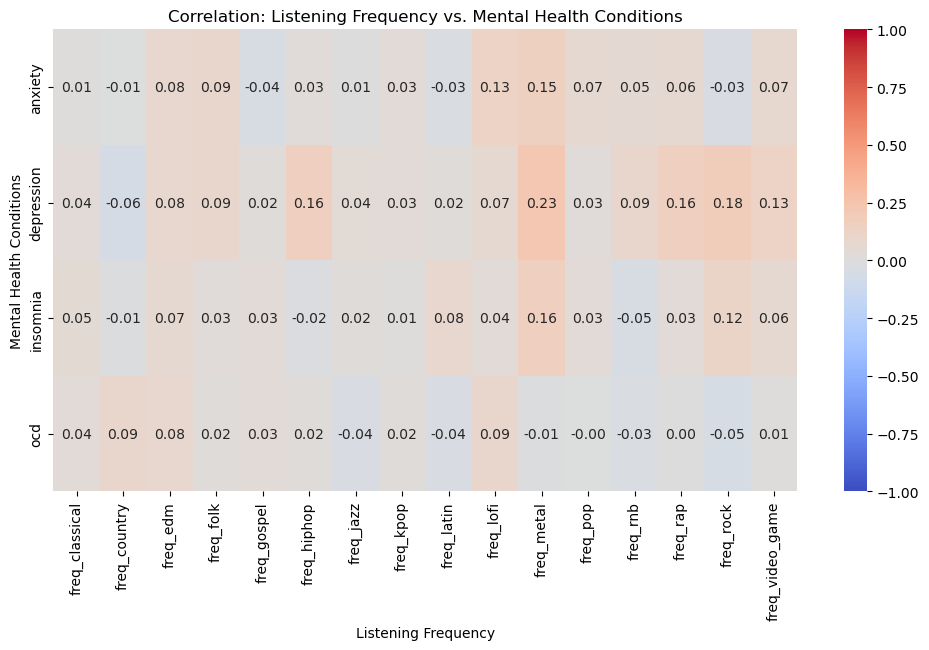

In [36]:
# Correlation Matrix 

# List of frequency columns
freq_columns = [
    'freq_classical', 'freq_country', 'freq_edm', 'freq_folk', 'freq_gospel',
    'freq_hiphop', 'freq_jazz', 'freq_kpop', 'freq_latin', 'freq_lofi',
    'freq_metal', 'freq_pop', 'freq_rnb', 'freq_rap', 'freq_rock', 'freq_video_game'
]

# Map non-numeric values to numeric equivalents for frequency columns
frequency_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Very often': 4
}

# Apply the mapping to all frequency columns
for col in freq_columns:
    if survey_clean[col].dtype == 'object':  
        survey_clean[col] = survey_clean[col].map(frequency_mapping)

# For mental health conditions, ensure they're numeric
for col in mental_health_conditions:
    if survey_clean[col].dtype == 'object':
        # Handle specific cases here, or convert categorical data if present
        survey_clean[col] = pd.to_numeric(survey_clean[col], errors='coerce')


# List of mental health condition columns
mental_health_conditions = [
    'anxiety', 'depression', 'insomnia', 'ocd'
]

# Extract the relevant data
selected_columns = freq_columns + mental_health_conditions
correlation_data = survey_clean[selected_columns]

# Drop rows with NaN values after mapping
survey_clean_na = survey_clean.dropna(subset=selected_columns)

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Select the subset of the correlation matrix
listening_vs_mental_health = correlation_matrix.loc[mental_health_conditions, freq_columns]

# Plot the filtered heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(listening_vs_mental_health, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation: Listening Frequency vs. Mental Health Conditions')
plt.xlabel('Listening Frequency')
plt.ylabel('Mental Health Conditions')
plt.show()

In [37]:
# A negative value reports that individuals who listen to the music genre more frequently report lower levels of a mental health condition
# Hip Hop, metal, Rock, and Rap all correlate more with Depression. It may be concluded that these genres are consumed during emotional highs. 
# Correlation does not imply causation, these relationships may be influenced by demographics and lifestyle factors. 

In [39]:
# T-Test trial 
    #age and music effects
# Define age groups 
young_group = survey_clean[survey_clean['age'] < 25]['hours_per_day']
older_group = survey_clean[survey_clean['age'] >= 25]['hours_per_day']

#T-Test

t_stat, p_value = ttest_ind(young_group, older_group)

#output 
print(f"T-Statistic: {t_stat: .3f}, P-Value: {p_value: .3f}")

#Interpretation
if p_value < 0.05:
    print("Significant difference between age groups regarding hours of music listening")
else: 
    print("No significant difference between age groups regarding hours of music listening")

T-Statistic:  2.600, P-Value:  0.010
Significant difference between age groups regarding hours of music listening
